In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Function to display multiple images side by side
def show_images(titles, images, cmap = None):
    plt.figure(figsize=(15,5))
    for i in range(len(images)):
        plt.subplot(1, len(images),i+1)
        if cmap:   # for grayscale
            plt.imshow(images[i], cmap=cmap)
        else:      # for color images
            plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis("off")
    plt.show()

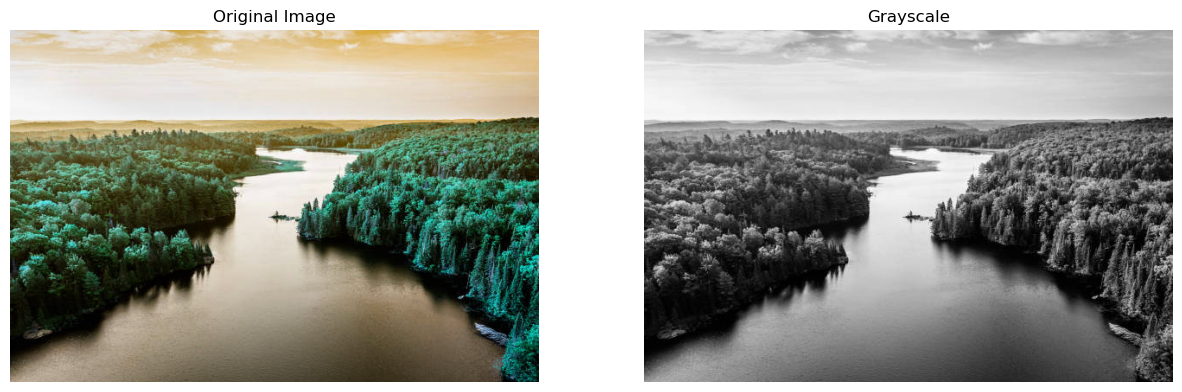

In [5]:
# Load an image (put 'sample.jpg' in same folder as notebook)
img = cv2.imread("C:/Users/Jui Sonawane/Desktop/FDIP/FDIP Assignment 3/Nature.jpg")
if img is None:
    raise ValueError("Image not found. Please place 'sample.jpg' in the working directory.")

# Convert to grayscale for simple analysis
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Show original image
show_images(["Original Image", "Grayscale"], [img, gray], cmap="gray")


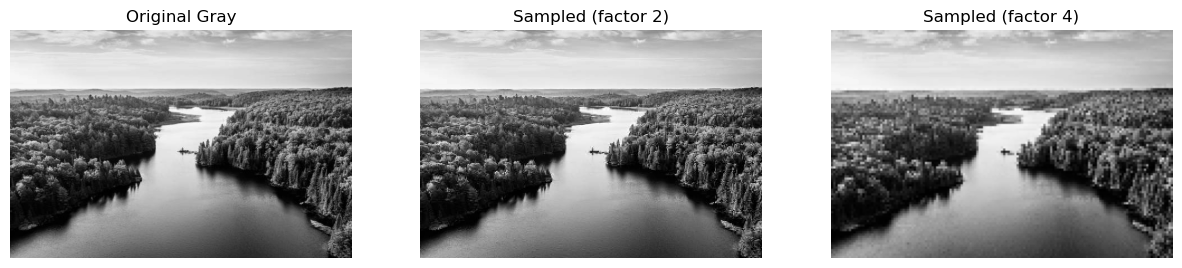

In [7]:
# Function for image sampling (reduce resolution by taking every k-th pixel)
def image_sampling(image, factor):
    return image[::factor, ::factor]

# Sampling with different factors
sampled_2 = image_sampling(gray, 2)
sampled_4 = image_sampling(gray, 4)

# Show results
show_images(
    ["Original Gray", "Sampled (factor 2)", "Sampled (factor 4)"],
    [gray, sampled_2, sampled_4],
    cmap="gray"
)


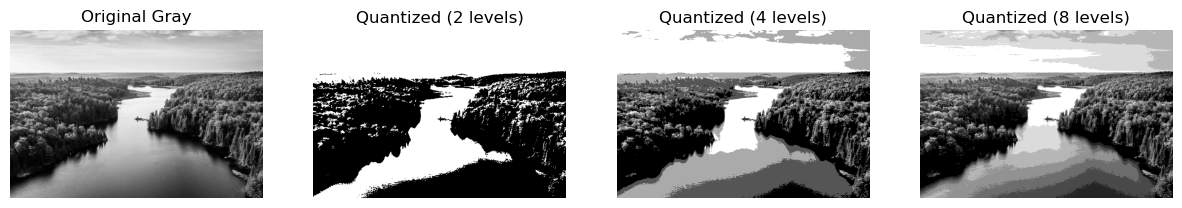

In [9]:
# Image Quantization
# Function for image quantization
def image_quantization(image, levels):
    step = 256 // levels
    quantized = (image // step) * step
    return quantized

# Quantize grayscale image into 2, 4, 8 levels
quant_2 = image_quantization(gray, 2)
quant_4 = image_quantization(gray, 4)
quant_8 = image_quantization(gray, 8)

# Show results
show_images(
    ["Original Gray", "Quantized (2 levels)", "Quantized (4 levels)", "Quantized (8 levels)"],
    [gray, quant_2, quant_4, quant_8],
    cmap="gray"
)


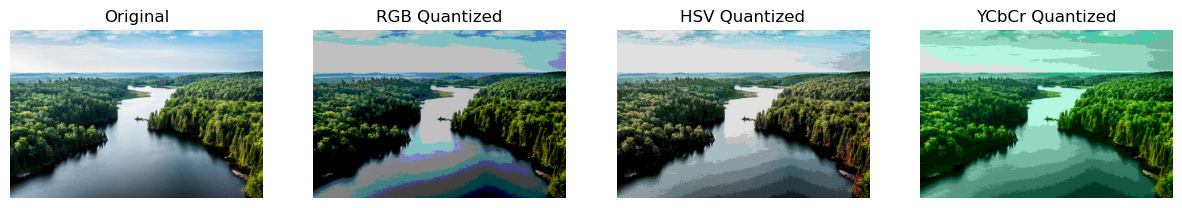

In [11]:
# RGB Quantization
rgb_quant = image_quantization(img, 4)

# HSV Quantization
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv_quant = image_quantization(hsv, 8)
hsv_back = cv2.cvtColor(hsv_quant, cv2.COLOR_HSV2BGR)

# YCbCr Quantization
ycb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
ycb_quant = image_quantization(ycb, 8)
ycb_back = cv2.cvtColor(ycb_quant, cv2.COLOR_YCrCb2BGR)

# Show results
show_images(
    ["Original", "RGB Quantized", "HSV Quantized", "YCbCr Quantized"],
    [img, rgb_quant, hsv_back, ycb_back]
)


In [13]:
# Print pixel values for analysis
print("Original Gray pixel values (50:60, 50:60):")
print(gray[50:60, 50:60])

print("\nQuantized (4 levels) pixel values:")
print(quant_4[50:60, 50:60])

print("\nUnique color levels in RGB Quantization:")
print(len(np.unique(rgb_quant.reshape(-1, 3), axis=0)))

print("\nUnique intensity levels in Grayscale Quantization (4 levels):")
print(np.unique(quant_4))


Original Gray pixel values (50:60, 50:60):
[[235 235 234 233 232 232 232 232 232 232]
 [236 235 235 234 234 233 231 231 231 231]
 [234 234 234 233 233 233 230 230 230 230]
 [233 233 233 233 233 233 232 232 232 232]
 [233 233 233 233 233 233 233 233 233 233]
 [234 234 234 234 234 235 231 231 231 231]
 [232 232 232 232 232 232 230 230 231 231]
 [231 231 231 231 231 231 229 229 230 230]
 [231 231 231 231 231 231 229 229 230 230]
 [233 233 233 233 233 233 231 231 232 232]]

Quantized (4 levels) pixel values:
[[192 192 192 192 192 192 192 192 192 192]
 [192 192 192 192 192 192 192 192 192 192]
 [192 192 192 192 192 192 192 192 192 192]
 [192 192 192 192 192 192 192 192 192 192]
 [192 192 192 192 192 192 192 192 192 192]
 [192 192 192 192 192 192 192 192 192 192]
 [192 192 192 192 192 192 192 192 192 192]
 [192 192 192 192 192 192 192 192 192 192]
 [192 192 192 192 192 192 192 192 192 192]
 [192 192 192 192 192 192 192 192 192 192]]

Unique color levels in RGB Quantization:
35

Unique intens